I `scp`'d one of Joe's catalogs of the SLAC server and am going to start playing with it. My first order of business was figuring out what it actually was, because it wasn't super clear to me how it was stored. For one thing, Joe wrote the file extension as `.fit` instead of `.fits` which threw me for a bigger loop than it should've. I also had to brush up on my astropy. 

In [4]:
from astropy.io import fits
hdulist = fits.open('/home/sean/Downloads/Buzzard-highres_v1.0_snfields_obs.fit')
print hdulist.info()

Filename: /home/sean/Downloads/Buzzard-highres_v1.0_snfields_obs.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU     39   1345374R x 11C   [K, D, D, E, E, 4E, 4E, E, E, I, B]   
None


In [5]:
data = hdulist[1].data
data.shape

(1345374,)

In [6]:
print data[:1000]

[ (909121, 43.177799224853516, 0.94513100385665894, 16.951042, 0.004166659, array([ 17.70660973,  17.25094414,  17.0893383 ,  16.95442581], dtype=float32), array([ 0.01091805,  0.00494499,  0.00461872,  0.00417967], dtype=float32), 0.0512329, 0.0, 0, 0)
 (909408, 42.898101806640625, 0.94212502241134644, 20.824661, 0.02744847, array([ 21.31021118,  20.92447853,  20.77585411,  20.79455376], dtype=float32), array([ 0.0612695 ,  0.02725015,  0.02633752,  0.02669777], dtype=float32), 0.0495423, 0.0, 0, 0)
 (909577, 43.180198669433594, 0.90289002656936646, 21.17029, 0.033501342, array([ 20.73554039,  20.89208412,  21.11346436,  21.18303108], dtype=float32), array([ 0.04446345,  0.02783066,  0.03294384,  0.03389682], dtype=float32), 0.053511798, 0.0, 0, 0)
 (909622, 42.702301025390625, 0.95246297121047974, 21.557201, 0.041814197, array([ 21.9032402 ,  21.6973362 ,  21.51233673,  21.43984795], dtype=float32), array([ 0.07237934,  0.04082802,  0.04020816,  0.03753017], dtype=float32), 0.0590527

In [7]:
elem = data[0]
print elem
print type(elem)

(909121, 43.177799224853516, 0.94513100385665894, 16.951042, 0.004166659, array([ 17.70660973,  17.25094414,  17.0893383 ,  16.95442581], dtype=float32), array([ 0.01091805,  0.00494499,  0.00461872,  0.00417967], dtype=float32), 0.0512329, 0.0, 0, 0)
<class 'astropy.io.fits.fitsrec.FITS_record'>


In [8]:
cols = data.columns
print cols.info()

name:
    ['ID', 'RA', 'DEC', 'IMAG', 'IMAG_ERR', 'MODEL_MAG', 'MODEL_MAGERR', 'ZTRUE', 'M200', 'CENTRAL', 'FLAGGED']
format:
    ['K', 'D', 'D', 'E', 'E', '4E', '4E', 'E', 'E', 'I', 'B']
unit:
    ['', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', '', '']
dim:
    ['', '', '', '', '', '', '', '', '', '', '']
None


In [9]:
c = data['CENTRAL']
print c, len(c)

[0 0 0 ..., 1 1 1] 1345374


244173 <type 'numpy.ndarray'>


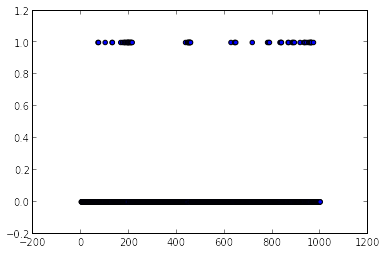

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
print c.sum(), type(c)
plt.scatter(xrange(1000), c[:1000])

In [24]:
from pandas import DataFrame
df = DataFrame(data)#Whoops doesn't work. 

ValueError: numpy.dtype has the wrong size, try recompiling

0.668422869775 0.357933654424


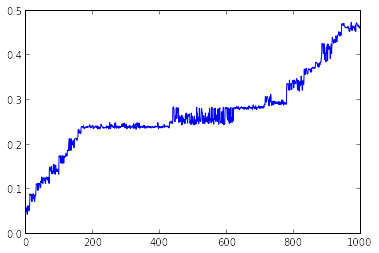

In [15]:
zs = data['ZTRUE']
print zs.mean(), zs.std()
plt.plot(zs[:1000])

792049670034.0 4.47917378747e+12


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


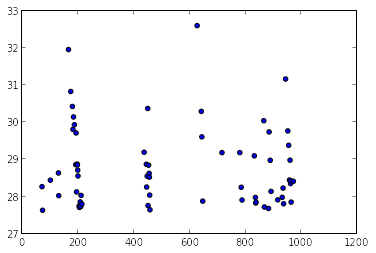

In [23]:
mass = data['M200']
import numpy as np
print mass.mean(), mass.std()
plt.scatter(xrange(1000), np.log(mass[:1000]))

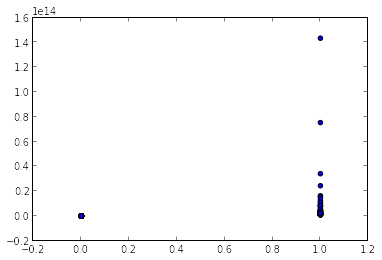

In [29]:
plt.scatter(c[:1000], mass[:1000])

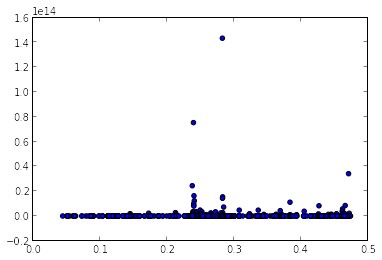

In [33]:
plt.scatter(zs[:1000], mass[:1000])
#plt.yscale('log')
plt.show()

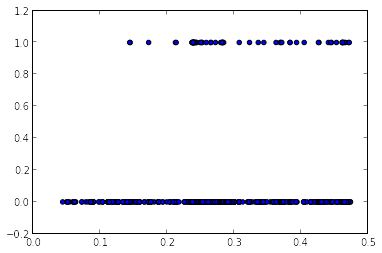

In [36]:
plt.scatter(zs[:1000], c[:1000])

In [37]:
hdulist = fits.open('/home/sean/Downloads/Buzzard-highres_v1.0_redmapper_lgt20_catalog.fit')
print hdulist.info()

Filename: /home/sean/Downloads/Buzzard-highres_v1.0_redmapper_lgt20_catalog.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    149   1021R x 66C   [J, D, D, 4E, 4E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 3E, 3E, 4E, E, E, E, I, E, E, E, E, 21E, 21E, I, E, D, D, E, E, E, E, E, E, E, I, I, 5D, 5D, 5K, 5E, 5E, 5E, 5E, 5E, 5E, E, 5E, 5E, E, E, E, E, E, E, E]   
None


In [39]:
data = hdulist[1].data
cols = data.columns
cols.info()

name:
    ['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'IMAG', 'IMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z', 'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ', 'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE', 'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG', 'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT', 'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT', 'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT', 'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'LIM_EXPTIME', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD']
format:
    ['J', 'D', 'D', '4E', '4E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '3E', '3E', '4E', 'E', 'E', 'E', 'I', 'E', 'E

(1021, 3)


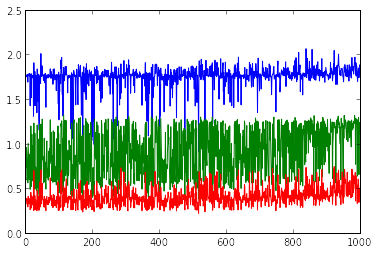

In [41]:
cl = data['C_LAMBDA']
print cl.shape
plt.plot(cl[:1000])